In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy import stats

The dataset is downloaded from [here](https://smoosavi.org/datasets/us_accidents).

In [2]:
full_df = pd.read_csv('US_Accidents.csv')
full_df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


For the purposes of this lab we will take the following features:

* Temperature(F) Shows the temperature (in Fahrenheit).
* Visibility(mi) Shows visibility (in miles).
* Precipitation(in)	Shows precipitation amount in inches, if there is any.

In [13]:
features = ['Temperature(F)', 'Visibility(mi)', 'Humidity(%)']


df = full_df[features]
df

,Temperature(F),Visibility(mi),Humidity(%)
0,42.1,10.0,58.0
1,36.9,10.0,91.0
2,36.0,10.0,97.0
3,36.0,10.0,97.0
4,39.0,10.0,55.0
...,...,...,...
1516059,86.0,10.0,40.0
1516060,70.0,10.0,73.0
1516061,73.0,10.0,64.0
1516062,71.0,10.0,81.0


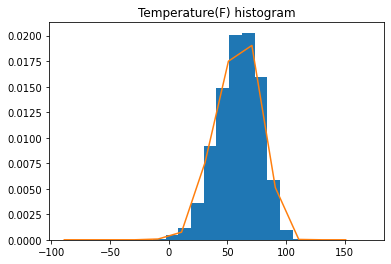

In [8]:
data = df['Temperature(F)'].dropna()
d = data.to_numpy()

n = len(data.value_counts())
bins = math.ceil(1 + 3.32 * np.log(n))
plt.hist(d, bins=bins, density=True)

kde = stats.gaussian_kde(d)
tiks = np.arange(d.min(), d.max(), 20)
plt.plot(tiks, kde(tiks))

plt.title("Temperature(F) histogram")
plt.show()

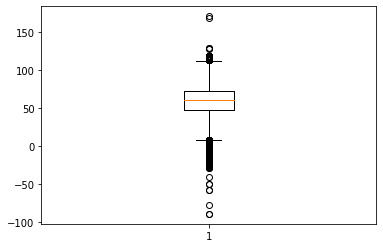

In [16]:
plt.boxplot(d)
plt.show()